# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 数据生成
X, y = make_moons(noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, y_train) # 训练
y_pred = model.predict(X_test) 
accuracy_score(y_pred, y_test) # 评估


0.8666666666666667

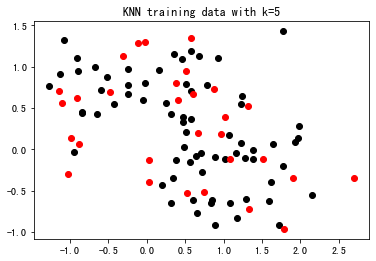

In [47]:
import matplotlib.pyplot as plt
import numpy as np

for clusterLabel in set(y_train):
    plt.scatter(X_train[np.where(y_train==clusterLabel)][:,0], X_train[np.where(y_train==clusterLabel)][:,1],c='black')
    plt.scatter(X_test[np.where(y_test==clusterLabel)][:,0], X_test[np.where(y_test==clusterLabel)][:,1],c='red')

k=model.n_neighbors
plt.title(f"KNN training data with k={k}")
plt.show()

## 3分类KNN问题

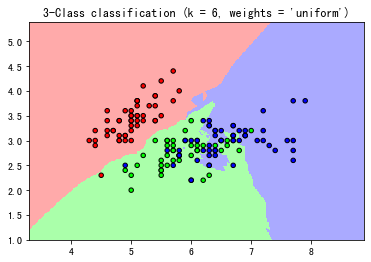

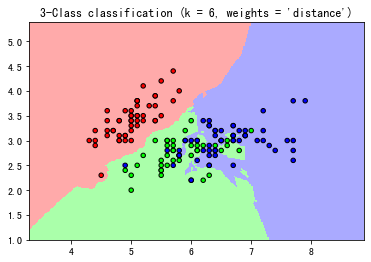

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 6

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,#画散点图
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()